# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, flatten each image to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use
>```
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

C:\Users\Fnma57\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
y = y.astype(int)
print('N = %i'%y.shape[0])

N = 70000


In [4]:
for i in range(10):
  print(f'count(j={i}) =',y[y==i].count())

count(j=0) = 6903
count(j=1) = 7877
count(j=2) = 6990
count(j=3) = 7141
count(j=4) = 6824
count(j=5) = 6313
count(j=6) = 6876
count(j=7) = 7293
count(j=8) = 6825
count(j=9) = 6958


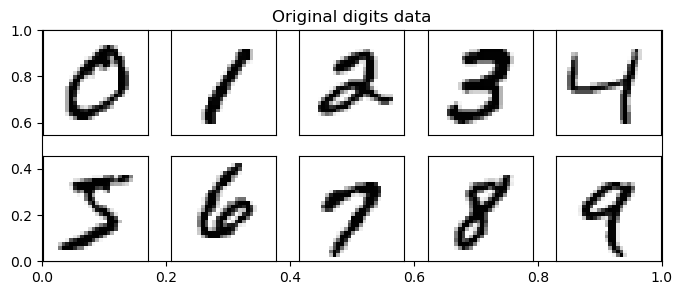

In [5]:
sampleDigits = np.array(X).reshape((-1,28,28))
fig = plt.figure(figsize=(8, 3))
plt.title("Original digits data")

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    num = sampleDigits[y==i]
    ax.imshow(num[0], cmap=plt.cm.binary)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model.
How would you esitmate each of the parameters of the model based on the trainning data?


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1

$P(x_i|y=j_d) = P(x_i|j_d)$ is a conditional probability of pixel $x_i$ occurring in digit class $j_d$

$P(y=j_d) = P(j_d)$ is a prior probability of a digit is digit class $j_d$

$P(y=j_d|k) = P(j_d|k)$ is the probability of digit class $j_d$ given digit k



$P(k|j_d) = P(x_{i_1},x_{i_2},...,x_{i_{784}}|j) = P(x_{i_1}|j)*P(x_{i_2}|j)*...*P(x_{i_{784}}|j)$

$j_{NB} = Argmax_{j_d}P(j_d|k) = Argmax_{j_d}P(k|j_d)*P(j_d)=argmax_{j_d}P(j_d)*\prod_\limits{m=1}^{784}(P(x_{i_m}|j_d))$

$\hat P(j_d)=count(j_d)/N = count(j_d)/70000$

$\hat P(x_{i_k}|j_d) = count(x_{i_k},j_d)/\sum\limits_{x_i\in j_d} count(x_i,j_d)$

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

In [7]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X_train)
X_train = binarizer.transform(X_train)
X_test = binarizer.transform(X_test)

In [8]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(force_alpha=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([5, 0, 9, ..., 1, 1, 6])

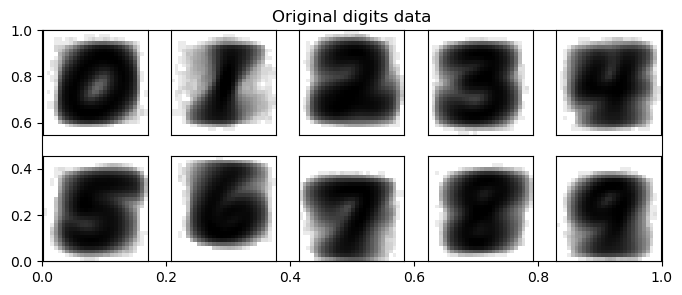

In [9]:
digit_pred = clf.feature_log_prob_
sampleDigits = np.array(digit_pred).reshape((-1,28,28))
fig = plt.figure(figsize=(8, 3))
plt.title("Original digits data")

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    num = sampleDigits[i]
    ax.imshow(num, cmap=plt.cm.binary)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
confus_matrix = confusion_matrix(y_test, y_pred)
for i in range(10):
  print(f'for digit {i} classifier recognize {confus_matrix[i]}')
print('Accuracy =',accuracy_score(y_test, y_pred))

for digit 0 classifier recognize [880   1   3   5   2  68  18   0  22   2]
for digit 1 classifier recognize [   0 1022   12    2    0    8    5    0   13    3]
for digit 2 classifier recognize [ 15  10 868  25  16   3  45   8  53   1]
for digit 3 classifier recognize [  4  21  40 848   2  28   5  10  47  24]
for digit 4 classifier recognize [  2   9   8   0 752   6  17   7  19 119]
for digit 5 classifier recognize [ 30  13   6 151  20 612  19   1  17  18]
for digit 6 classifier recognize [ 12  19  18   1  10  41 844   0   8   1]
for digit 7 classifier recognize [  5  20  13   3  29   2   0 879  19  85]
for digit 8 classifier recognize [ 13  52  20  93   9  30   7   1 794  46]
for digit 9 classifier recognize [ 10  16   3  10  67   5   0  45  25 780]
Accuracy = 0.8279


In 83% of predictions a classifier is correct.

1 - is the number that the classifier recognizes best

5 - is the number that the classifier recognizes worst of all

Digits 4 and 9 more similar to each another

For digit 5 digit 3 is the most similar

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`. If there are differences try to think why
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

Bonus: How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/Shaboodi/right_but_why

In [86]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
X_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

'''df = pd.DataFrame([X_train.data, X_train.target.tolist()]).T
df.columns = ['text', 'target']

targets = pd.DataFrame( X_train.target_names)
targets.columns=['title']
out = pd.merge(df, targets, left_on='target', right_index=True)
'''
y = X_train['target']


In [262]:
X_test1 = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
y_test = X_test1['target']

In [263]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_train['data'])

feature_names = vectorizer.get_feature_names_out()
#print(feature_names)
print('Number of words in vacabluary', feature_names.shape[0])

Number of words in vacabluary 101322


In [264]:
vectorizer = CountVectorizer(stop_words='english',max_features=10000)
X = vectorizer.fit_transform(X_train['data'])
X = X.toarray()
feature_names = vectorizer.get_feature_names_out()
#print(feature_names)
print('Number of words in vacabluary', feature_names.shape[0])
pipeline = Pipeline([('vectorizer', vectorizer), ('NaiveBayes', NaiveBayes())])
X_test = vectorizer.transform(X_test1['data'])
X_test = X_test.toarray()
X_test[500:520]

Number of words in vacabluary 10000


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [265]:
from sklearn.base import BaseEstimator, ClassifierMixin
class NaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        self.prior = np.zeros((n_classes), dtype=float)
        self.likelihood = np.zeros((n_classes, n_features), dtype=float)
        
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.prior[i] = X_c.shape[0]/n_samples 
            self.likelihood[i,:] = X_c.T.sum(axis=1) / X_c.sum()            
            
            
    def predict_proba(self, i, x):
        likelihood_matrix = self.likelihood[i]
        return self.prior[i]*(likelihood_matrix.T@ x)
        
        
        
    def predict(self, X):
        y_pred = np.zeros(((self.classes).shape[0], X.shape[0]), dtype=float)
        for j in range(X.shape[0]):
            for i, c in enumerate(self.classes):
                y_pred[i,j] = self.predict_proba(i,X[j])
        return np.array(np.argmax(y_pred,axis=0))

In [275]:
clf = NaiveBayes()
clf.fit(X,y)
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))
clf.classification_report(X_test,y_test)

(7532,)
(7532,)
(7532, 10000)
0.4834041423260754


AttributeError: 'NaiveBayes' object has no attribute 'classification_report'

In [269]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [273]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
print(clf.predict(X_test))
clf.score(X_test, y_test)

[ 7  1 15 ... 15  3  0]


0.627854487519915

In [272]:
y_pred

array([ 9,  8, 15, ...,  4,  3, 15], dtype=int64)